In [1]:
#导入自带数据集
from sklearn import datasets
#导入交叉验证库
from sklearn import cross_validation
#导入SVM分类算法库
from sklearn import svm
#导入图表库
import matplotlib.pyplot as plt
#生成预测结果准确率的混淆矩阵
from sklearn import metrics

/home/lmolhw/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#读取自带数据集并赋值给digits
digits = datasets.load_digits()

In [3]:
#查看数据集中数字9的矩阵
digits.data[9]

array([  0.,   0.,  11.,  12.,   0.,   0.,   0.,   0.,   0.,   2.,  16.,
        16.,  16.,  13.,   0.,   0.,   0.,   3.,  16.,  12.,  10.,  14.,
         0.,   0.,   0.,   1.,  16.,   1.,  12.,  15.,   0.,   0.,   0.,
         0.,  13.,  16.,   9.,  15.,   2.,   0.,   0.,   0.,   0.,   3.,
         0.,   9.,  11.,   0.,   0.,   0.,   0.,   0.,   9.,  15.,   4.,
         0.,   0.,   0.,   9.,  12.,  13.,   3.,   0.,   0.])

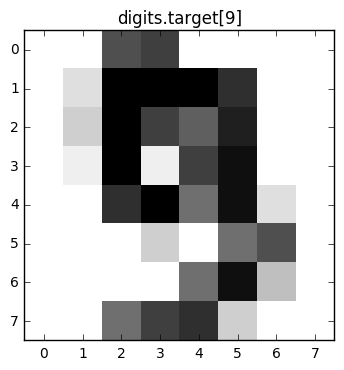

In [4]:
#绘制图表查看数据集中数字9的图像
plt.imshow(digits.images[9], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('digits.target[9]')
plt.show()

In [5]:
#数据集中的目标分类
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
#将数据集中的目标赋给Y
Y=digits.target

In [7]:
#使用reshape函数对矩阵进行转换，并赋值给X
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, 64))

In [9]:
#查看X和Y的行数
X.shape,Y.shape

((1797, 64), (1797,))

In [10]:
#随机抽取生成训练集和测试集，其中训练集的比例为60%，测试集40%
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)

In [11]:
#查看训练集的行数
X_train.shape,y_train.shape

((1078, 64), (1078,))

In [12]:
#生成SVM分类模型
clf = svm.SVC(gamma=0.001)

In [13]:
#使用训练集对svm分类模型进行训练
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#对测试集数据进行预测
predicted=clf.predict(X_test)

In [15]:
#查看前20个测试集的预测结果
predicted[:20]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8])

In [16]:
#查看测试集中的真实结果
expected=y_test

In [17]:
#查看测试集中前20个真实结果
expected[:20]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8])

In [18]:
#生成准确率的混淆矩阵(Confusion matrix)
metrics.confusion_matrix(expected, predicted)

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 73,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 69,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 70,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 76,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 77,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 74]])